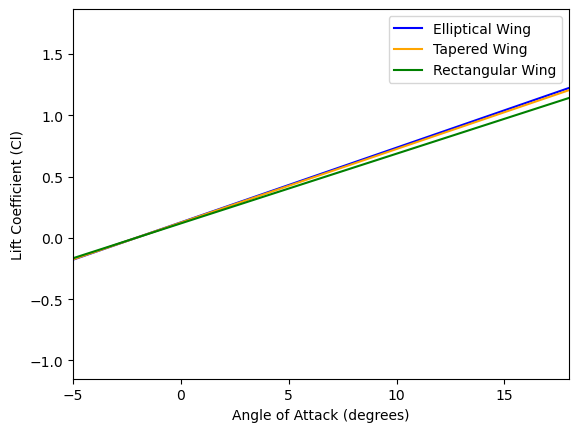

In [1]:
import numpy as np
import matplotlib.pyplot as plt

e_ell = 1
e_tap = 0.95
e_rect = 0.8
a0 = 2*np.pi
AR = 5

a_ell = a0/(1 + (a0/(np.pi*e_ell*AR)))
a_tap = a0/(1 + (a0/(np.pi*e_tap*AR)))
a_rect = a0/(1 + (a0/(np.pi*e_rect*AR)))

aoa_L0 = np.deg2rad(-2.077)

alpha_eff = np.linspace(np.deg2rad(-15), np.deg2rad(20), 5) # Can be low, because lift curve is linear

Cl_ell = a_ell * (alpha_eff - aoa_L0)
Cl_tap = a_tap * (alpha_eff - aoa_L0)
Cl_rect = a_rect * (alpha_eff - aoa_L0)

ai_ell = Cl_ell / (np.pi * e_ell * AR)
ai_tap = Cl_tap / (np.pi * e_tap * AR)
ai_rect = Cl_rect / (np.pi * e_rect * AR)

alpha = alpha_eff + ai_ell

plt.plot(np.rad2deg(alpha), Cl_ell, label='Elliptical Wing', color='blue')
plt.plot(np.rad2deg(alpha), Cl_tap, label='Tapered Wing', color='orange')
plt.plot(np.rad2deg(alpha), Cl_rect, label='Rectangular Wing', color='green')
plt.xlabel('Angle of Attack (degrees)')
plt.ylabel('Lift Coefficient (Cl)')
plt.legend()
plt.xlim(-5, 18)
plt.show()

(0.0, 0.07440972)

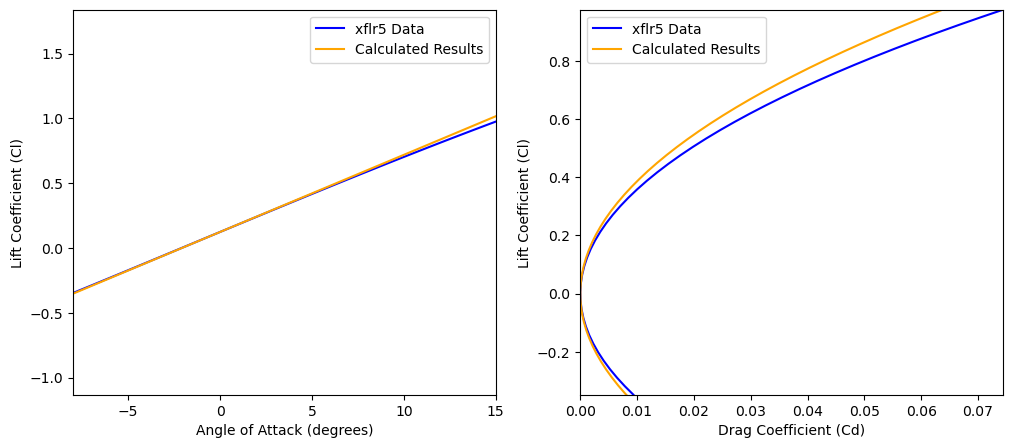

In [17]:
import pandas as pd
e_tap = 0.95
a0 = 2*np.pi
AR = 5

a_tap = a0/(1 + (a0/(np.pi*e_tap*AR)))

aoa_L0 = np.deg2rad(-2.077)

alpha_eff = np.linspace(np.deg2rad(-15), np.deg2rad(20), 100) # Can be low, because lift curve is linear

Cl_tap = a_tap * (alpha_eff - aoa_L0)

ai_tap = Cl_tap / (np.pi * e_tap * AR)

alpha = alpha_eff + ai_tap

C_D_tap = (Cl_tap**2) / (np.pi * e_tap * AR)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

df = pd.read_csv('C_Lvsalphatap.csv')  # Assuming the data is in this CSV file
ax[0].plot(df['Alpha'], df['T1-10.0 m/s-Panel-Inviscid'], label='xflr5 Data', color='blue')
df = pd.read_csv('C_lvsC_dTap.csv')  # Assuming the data is in this CSV file
ax[1].plot(df['CD'], df['T1-10.0 m/s-Panel-Inviscid'], label='xflr5 Data', color='blue')

ax[0].plot(np.rad2deg(alpha), Cl_tap, label='Calculated Results', color='orange')
ax[1].plot(C_D_tap, Cl_tap, label='Calculated Results', color='orange')
ax[0].set_xlabel('Angle of Attack (degrees)')
ax[1].set_xlabel('Drag Coefficient (Cd)')
ax[0].set_ylabel('Lift Coefficient (Cl)')
ax[1].set_ylabel('Lift Coefficient (Cl)')
ax[0].legend()
ax[1].legend()
ax[0].set_xlim(-8, 15)
ax[1].set_ylim(min(df['T1-10.0 m/s-Panel-Inviscid']), max(df['T1-10.0 m/s-Panel-Inviscid']))
ax[1].set_xlim(0, max(df['CD']))